# Long-term pulsar observations with UTR-2 and GURT

### Pulsars B0031-07, B1133+16, B1508+55, and B1919+21

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Reading measurement data (SNR and DM) from the xlsx file

In [9]:
meas = pd.read_excel('DATA/Pulsars_fluxes.xlsx', sheet_name='Sheet1')

#print(meas[['Date','SNR B1133+16 UTR2 full']])
#print(meas)
#print(meas.keys())
#print(meas['Date'][0])

#### Constants

In [3]:
kB = 1.38064852 * pow(10,-23)         # Boltzmann constant, J / K
dt = 14400                            # Integration time, s
t_resol = 9.8 * pow(10,-3)            # Temporal resolution, s
AeMAX_UTR2 = 130000                   # Full UTR-2 effective area for zenith direction at 25 MHz, m2
AeMAX_U01N = 14000                    # UTR-2 section 01 effective area for zenith direction at 25 MHz, m2
AeMAX_U09W = 12000                    # UTR-2 section 09 effective area for zenith direction at 25 MHz, m2
AeMAX_GURT = 230                      # GURT subarray effective area for zenith direction at 50 MHz, m2
df_UTR2 = 16.5 * pow(10,6)            # Frequency range of UTR-2 observations, Hz
df_GURT = 40 * pow(10,6)              # Frequency range of GURT observations, Hz
l_UTR2 = 2                            # Polarization coefficient for UTR-2
l_GURT = 1                            # Polarization coefficient for GURT

#### Parameters of pulsars (names, rotation periods, projection of effective area, background brightnes temperatures for UTR-2 at 25 MHz and GURT at 50 MHz)

In [4]:
param = pd.DataFrame({
    'Name': ['В0031-07', 'В1133+16', 'В1508+55', 'В1919+21'],
    'Period':      [0, 1.188, 0.740, 1.337],
    'Cosinus':     [0, 0.875, 0.985, 0.914],
    'Tbg_UTR2':    [0, 24000, 22000, 42000],
    'Tbg_GURT':    [0, 8000,  8000,  12000],
    'TauToP_UTR2': [0, 0.1,   0.22,  0.06],
    'TauToP_GURT': [0, 0.065, 0.16,  0.03]})

print('\n Parameters of pulsars: \n\n', param, '\n\n')


 Parameters of pulsars: 

        Name  Period  Cosinus  Tbg_UTR2  Tbg_GURT  TauToP_UTR2  TauToP_GURT
0  В0031-07   0.000    0.000         0         0         0.00        0.000
1  В1133+16   1.188    0.875     24000      8000         0.10        0.065
2  В1508+55   0.740    0.985     22000      8000         0.22        0.160
3  В1919+21   1.337    0.914     42000     12000         0.06        0.030 




#### Calculations of fluxes
The full formula for pulsar flux calculations:
$$
\Delta S = \frac{SNR \cdot l \cdot k_B\ \cdot T_{\text{sky}}}{A_{\text{eff}}\ \sqrt{\Delta t \cdot \Delta f \cdot (\tau / P)}} 
$$

$SNR$ - signal-to-noise ratio obtained during observations 
<br>
$l$ - polarization coefficient (2 for UTR-2 and 1 for GURT)
<br>
$k_B$ - Boltzmann constant
<br>
$T_{\text{sky}}$ - sky background temperature, K
<br>
$A_{\text{eff}}$ - radio telescope effective area to the pulsar direction. We obtain the area as a product of maximal effective area of the telescope and cosinus of the zenith angle: $A_{\text{eff}} = A_{\text{eff max}} \cdot \cos (z)$
<br>
$\Delta t$ - integration time, s
<br>
$\Delta f$ - integration frequency range, Hz
<br>
$\tau$ - duration of pulsar pulse, s
<br>
$P$ - pulsar period, s
<br>

For calculations we use averaged singnal in the frequency ranges of the radio telescopes (16.5 - 33.0 MHz for UTR-2 and 30 - 70 MHz for GURT). The parameters  $T_{\text{sky}}$ and $A_{\text{eff max}}$ are taken for the central frequencies of the ranges, e.g. 24.5 MHz for UTR-2 and 50 MHz for GURT. In fact they are not linear, so this rough assumption affects the accuracy of the calculations.

In [5]:
pulsar_fluxes = pd.DataFrame({
   
'Date': meas['Date'], 
'B1133+16 flux UTR2 full': meas['SNR B1133+16 UTR2 full'] * param['TauToP_UTR2'][1] * l_UTR2 * kB * param['Tbg_UTR2'][1] / (AeMAX_UTR2 * param['Cosinus'][1] * np.sqrt(dt * df_UTR2 * t_resol / param['Period'][1])),
'B1133+16 flux GURT':      meas['SNR B1133+16 GURT']      * param['TauToP_GURT'][1] * l_GURT * kB * param['Tbg_GURT'][1] / (AeMAX_GURT * param['Cosinus'][1] * np.sqrt(dt * df_GURT * t_resol / param['Period'][1])),
'B1508+55 flux UTR2 full': meas['SNR B1508+55 UTR2 full'] * param['TauToP_UTR2'][2] * l_UTR2 * kB * param['Tbg_UTR2'][2] / (AeMAX_UTR2 * param['Cosinus'][2] * np.sqrt(dt * df_UTR2 * t_resol / param['Period'][2])),
'B1508+55 flux GURT':      meas['SNR B1508+55 GURT']      * param['TauToP_GURT'][2] * l_GURT * kB * param['Tbg_GURT'][2] / (AeMAX_GURT * param['Cosinus'][2] * np.sqrt(dt * df_GURT * t_resol / param['Period'][2])),
'B1919+21 flux UTR2 full': meas['SNR B1919+21 UTR2 full'] * param['TauToP_UTR2'][3] * l_UTR2 * kB * param['Tbg_UTR2'][3] / (AeMAX_UTR2 * param['Cosinus'][3] * np.sqrt(dt * df_UTR2 * t_resol / param['Period'][3])),
'B1919+21 flux GURT':      meas['SNR B1919+21 GURT']      * param['TauToP_GURT'][3] * l_GURT * kB * param['Tbg_GURT'][3] / (AeMAX_GURT * param['Cosinus'][3] * np.sqrt(dt * df_GURT * t_resol / param['Period'][3]))
})


#### Making plots

[-1, 27, 0.001, 10]

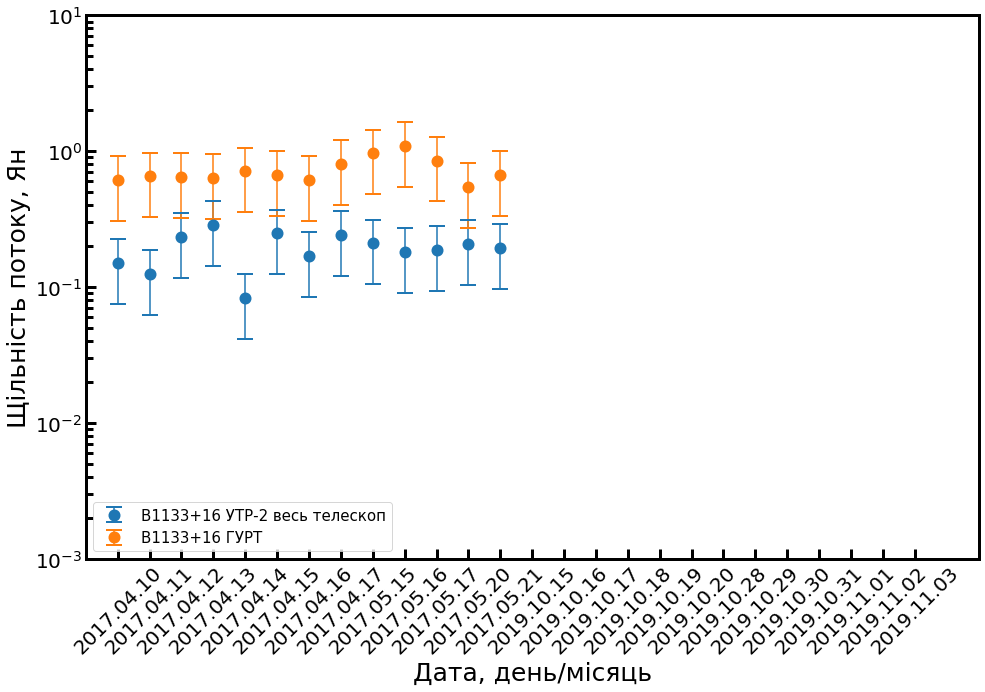

In [6]:
plt.figure(facecolor = 'white', figsize = (16, 10))
ax = plt.subplot(111)
ax.set_yscale("log", nonposy='clip')
plt.errorbar(pulsar_fluxes['Date'], pulsar_fluxes['B1133+16 flux UTR2 full']*pow(10,26), yerr=pulsar_fluxes['B1133+16 flux UTR2 full']*pow(10,26)*0.5, label = 'B1133+16 УТР-2 весь телескоп', fmt='o', markersize=10, capsize=8, markeredgewidth = 2)
plt.errorbar(pulsar_fluxes['Date'], pulsar_fluxes['B1133+16 flux GURT']*pow(10,26), yerr=pulsar_fluxes['B1133+16 flux GURT']*pow(10,26)*0.5, label = 'B1133+16 ГУРТ', fmt='o', markersize=10, capsize=8, markeredgewidth = 2)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3.0)
ax.xaxis.set_tick_params(width=3, which='both', direction='in', length=10, labelsize = 20)
ax.yaxis.set_tick_params(width=3, which='major', direction='in', length=10, labelsize = 20)
ax.yaxis.set_tick_params(width=3, which='minor', direction='in', length=7, labelsize = 20)
plt.xlabel('Дата, день/місяць', fontsize=25)
plt.ylabel('Щільність потоку, Ян', fontsize=25)
plt.xticks(rotation=45)
plt.legend(loc = 'lower left', fontsize = 15)
plt.axis([-1, len(pulsar_fluxes.index)+1, 0.001, 10])





[-1, 27, 0.001, 10]

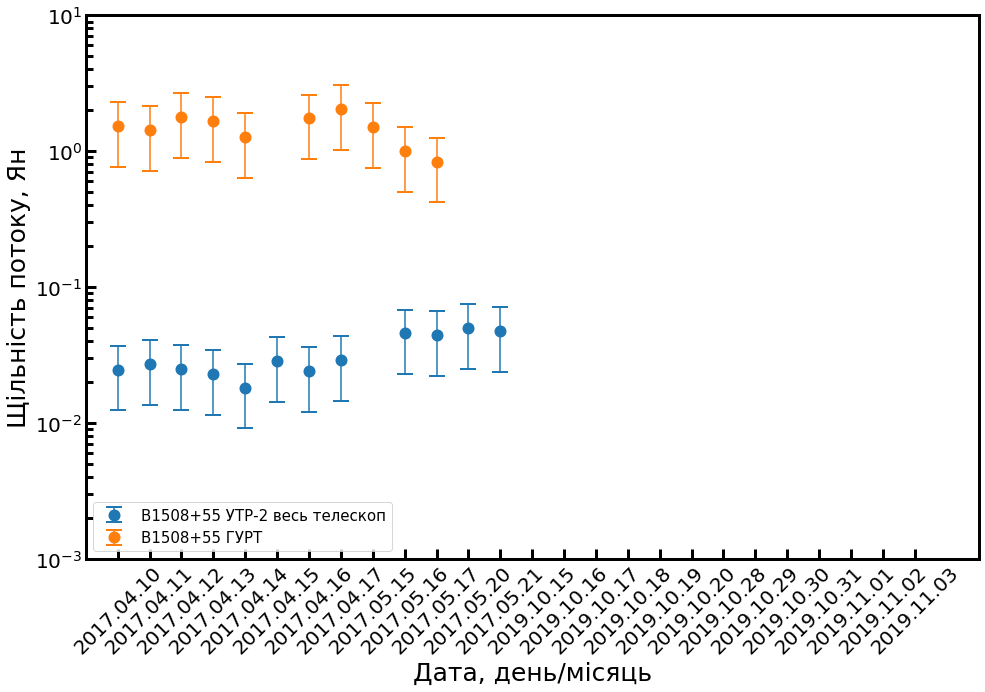

In [7]:
plt.figure(facecolor = 'white', figsize = (16, 10))
ax = plt.subplot(111)
ax.set_yscale("log", nonposy='clip')
plt.errorbar(pulsar_fluxes['Date'], pulsar_fluxes['B1508+55 flux UTR2 full']*pow(10,26), yerr=pulsar_fluxes['B1508+55 flux UTR2 full']*pow(10,26)*0.5, label = 'B1508+55 УТР-2 весь телескоп', fmt='o', markersize=10, capsize=8, markeredgewidth = 2)
plt.errorbar(pulsar_fluxes['Date'], pulsar_fluxes['B1508+55 flux GURT']     *pow(10,26), yerr=pulsar_fluxes['B1508+55 flux GURT']     *pow(10,26)*0.5, label = 'B1508+55 ГУРТ',                fmt='o', markersize=10, capsize=8, markeredgewidth = 2)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3.0)
ax.xaxis.set_tick_params(width=3, which='both', direction='in', length=10, labelsize = 20)
ax.yaxis.set_tick_params(width=3, which='major', direction='in', length=10, labelsize = 20)
ax.yaxis.set_tick_params(width=3, which='minor', direction='in', length=7, labelsize = 20)
plt.xlabel('Дата, день/місяць', fontsize=25)
plt.ylabel('Щільність потоку, Ян', fontsize=25)
plt.xticks(rotation=45)
plt.legend(loc = 'lower left', fontsize = 15)
plt.axis([-1, len(pulsar_fluxes.index)+1, 0.001, 10])

[-1, 27, 0.001, 10]

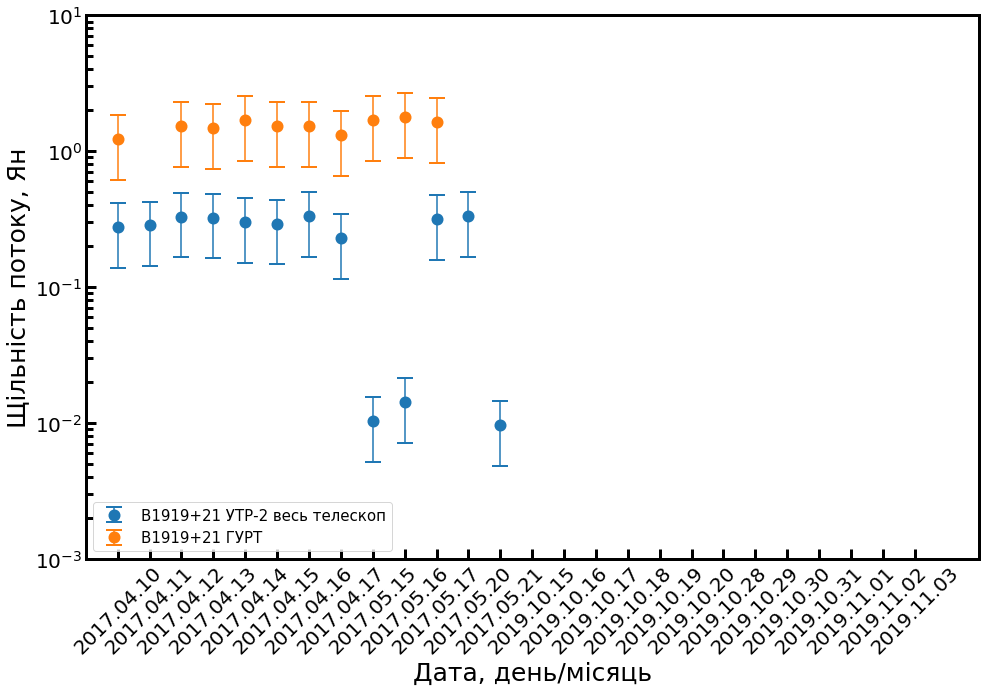

In [8]:
plt.figure(facecolor = 'white', figsize = (16, 10))
ax = plt.subplot(111)
ax.set_yscale("log", nonposy='clip')
plt.errorbar(pulsar_fluxes['Date'], pulsar_fluxes['B1919+21 flux UTR2 full']*pow(10,26), yerr=pulsar_fluxes['B1919+21 flux UTR2 full']*pow(10,26)*0.5, label = 'B1919+21 УТР-2 весь телескоп', fmt='o', markersize=10, capsize=8, markeredgewidth = 2)
plt.errorbar(pulsar_fluxes['Date'], pulsar_fluxes['B1919+21 flux GURT']     *pow(10,26), yerr=pulsar_fluxes['B1919+21 flux GURT']     *pow(10,26)*0.5, label = 'B1919+21 ГУРТ',                fmt='o', markersize=10, capsize=8, markeredgewidth = 2)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3.0)
ax.xaxis.set_tick_params(width=3, which='both', direction='in', length=10, labelsize = 20)
ax.yaxis.set_tick_params(width=3, which='major', direction='in', length=10, labelsize = 20)
ax.yaxis.set_tick_params(width=3, which='minor', direction='in', length=7, labelsize = 20)
plt.xlabel('Дата, день/місяць', fontsize=25)
plt.ylabel('Щільність потоку, Ян', fontsize=25)
plt.xticks(rotation=45)
plt.legend(loc = 'lower left', fontsize = 15)
plt.axis([-1, len(pulsar_fluxes.index)+1, 0.001, 10])
